# Objectives

* Assemble a Michelson interferometer,
* measure the wavelength of a laser,
* determine the refractive index of acrylic, and
* determine the thermal expansion coefficient of aluminum.

# Install and import libraries

In [22]:
!pip install whit-phys-util 1>/dev/null

In [23]:
import numpy as np
import pandas as pd
import whit_phys_util as buc
import matplotlib.pyplot as plt

# Connect to GitHub

In [24]:
repo = buc.local_repository("https://github.com/PS251-FA25/michelson-1h")

Repository exists at this location. Pulling changes from GitHub.


# Equipment

| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| Michelson interferometer kit | Thorlabs | EDU-MINT2 | --- |
| diode laser emitting at _fill in_ | Thorlabs | fill in | --- |
| power supply | Bk Percision | 1697B | 554B23114 |
| multimeter | Fluke | fill in | fill in |
| digital thermometer | Greisinger | g1710-GE | E0930861 |


In [25]:
de1 = buc.DynamicDataEntry('wavelength_data.csv',['Initial position (um)', 'Final posistion (um)'],5)

In [26]:
de1.edit_sheet()

DataGrid(auto_fit_columns=True, auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_render…

In [28]:
de1.save()
repo.push('Data for laser wavelength')

KeyboardInterrupt: Interrupted by user

#Analysis


In [29]:
df_wavelength = de1.get_dataframe()

In [30]:
df_wavelength['delta'] = df_wavelength['Final posistion (um)'] - df_wavelength['Initial position (um)']
df_wavelength

,Initial position (um),Final posistion (um),delta
0,0.0,33.0,33.0
1,33.0,61.0,28.0
2,61.0,95.0,34.0
3,95.0,122.0,27.0
4,122.0,148.0,26.0


In [31]:
delta = df_wavelength['delta'].mean()
delta_unc = 2*df_wavelength['delta'].sem()
print(delta)
print(delta_unc)

29.6
3.261901286060018


In [32]:
N = 100
waveL= ((2*delta)/N)*1000 #multiplying by 1000 changed \lambda from um --> nm
waveL_unc = ((2*delta_unc)/N)*1000
print("Wavelength: ", waveL)
print("Wavelength Uncertainty: ", waveL_unc)

Wavelength:  592.0000000000001
Wavelength Uncertainty:  65.23802572120036


In [33]:
percent_err = abs((waveL - 532)/532)*100
print("Percent Error: ", percent_err)

Percent Error:  11.278195488721826


#Thermal expansion


In [34]:
de3 = buc.DynamicDataEntry('thermal_data.csv',['Voltage (V)', 'Temperature (C)', 'Delta N'], (0,10,2))

In [35]:
de3.edit_sheet()


DataGrid(auto_fit_columns=True, auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_render…

In [36]:
de3.save()
repo.push('Data for thermal expansion')


        *************************************************************
        * Are you sure you want to push your changes?               *
        *                                                           *
        * Press "q" to abort. Press any other key to continue...    *
        *************************************************************
        q

!! PUSH ABORTED !!



In [37]:
df_thermal = de3.get_dataframe()

In [38]:
df_thermal['N'] = df_thermal['Delta N'].cumsum()
df_thermal

,Voltage (V),Temperature (C),Delta N,N
0,0.0,23.7,0.0,0.0
1,2.0,24.4,8.0,8.0
2,4.0,28.3,29.0,37.0
3,6.0,37.0,62.0,99.0
4,8.0,46.0,71.0,170.0
5,10.0,57.6,91.0,261.0


In [39]:
df_thermal['delta T'] = df_thermal['Temperature (C)'] - df_thermal['Temperature (C)'].iloc[0]
df_thermal

,Voltage (V),Temperature (C),Delta N,N,delta T
0,0.0,23.7,0.0,0.0,0.0
1,2.0,24.4,8.0,8.0,0.7
2,4.0,28.3,29.0,37.0,4.6
3,6.0,37.0,62.0,99.0,13.3
4,8.0,46.0,71.0,170.0,22.3
5,10.0,57.6,91.0,261.0,33.9


In [40]:
fit,fitFunc = buc.prettyPolyFit(df_thermal['delta T'], df_thermal['N'])
fit

,slope,intercept
value,7.630479,0.706692
uncertainty,0.145421,2.550085


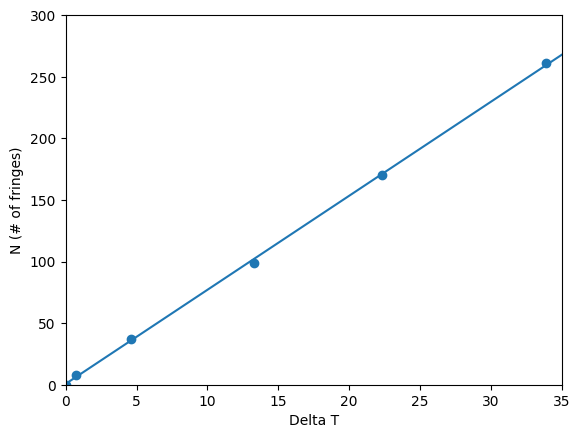

In [41]:
fig, ax = plt.subplots()
ax.scatter(df_thermal['delta T'], df_thermal['N'])
t_fit = np.linspace(0,35,2);
ax.plot(t_fit, fitFunc(t_fit));
ax.set_xlabel('Delta T')
ax.set_ylabel('N (# of fringes)')
ax.set_xlim(0,35);
ax.set_ylim(0,300);

In [42]:
L_0 = 0.09
slope = fit['slope']['value']
slope_unc = fit['slope']['uncertainty']
alph = ((slope*(waveL*1e-9)))/(2 * L_0)
alph_unc = ((slope_unc*(waveL_unc*1e-9)))/(2 * L_0)
print("Experimental Thermal exapnsion Coeff. : ", alph)
print("And its Uncertainty: ", alph_unc)

Experimental Thermal exapnsion Coeff. :  2.509579842846938e-05
And its Uncertainty:  5.2705462409360564e-08


In [43]:
lit_value = 2.31e-5
percent_err_alph = abs((alph - lit_value)/lit_value)*100
print("Percent Error: ", percent_err_alph)

Percent Error:  8.639820036663984


Experimental Thermal exapnsion Coeff. : $ 2.51\times10^{-5}$ $K^{-1}$

lit_value: $2.31\times10^{-5}$ $K^{-1}$

Percenet error: 8.64%

Although this percent error is moderate, it is much larger than our calculated uncertainty of $5.27\times10^{-08}$ $K^{-1}$. The difference between the measured and literature values is over 30–40 times the size of our uncertainty, meaning the literature value lies far outside our uncertainty range. This indicates that systematic errors such as inaccurate temperature measurement, non-uniform heating of the rod, calibration error in the fringe count. The very small calculated uncertainty from the linear fit only accounts for random variation in fringe counting and does not capture these systematic effects.